## Empircal Orthogonal Function Analysis (EOFs)

### Framing of the problem:

In climate, we often have a lot of data that varies (and co-varies) in space and time.  For example, we have our monthly precipitation data as time series of maps with dimensions `[time, lat, lon]`. 

We want to understand the variability of the precipitation and answer questions like: 

* Why does it rain more or less at times in this location or that location? 

* What large-scale patterns are there that are associated with more or less rainfall in certain regions?  

* Is there any regularity in time about when it rains more or less?

It is impossible to look at thousands or tens of thousands of maps or even movies of our data to identify patterns and understand this.

__Climate data is complicated because it varies in space and time__

### We use EOFs to simplify our data

A fundamental characteristic of EOFs is that it decomposes data into a set of components that are each __orthogonal__ (i.e. uncorrelated).

The most common type of EOF analysis used in climate data science is: **Principal Component Analysis (PCA)**. In PCA, we simplify our data by trying to identify the patterns in the data that are associated with the _largest amount of variability_. 

### Overview Summary 

EOF analysis of climate data will:

* Find the spatial patterns of variabilty
* Find their time variation
* Give a measure of importance of each pattern

You can think of EOFs as:

* a method for simplifying our data (data reduction method)
* a way of identifying spatial and temporal patterns of importance (in terms of variance for PCA) in climate data 

-------------------
### What is an EOF?

_Note: This is a high-level explanation designed to not require extensive math.  The detailed mathematical explanation is left for statistics class or this [document](http://brunnur.vedur.is/pub/halldor/PICKUP/eof.pdf)._

It is a way of reducing the complexity of our data by finding a new coordinate system (instead of x,y,z,...) which aligns with the direction of the most variance in the data.  The coordinates where the data has little variance can then be eliminated, reducing the dimensionality and complexity of our data.

### How do we calculate them (and some terminology)?

Sticking with the example of EOFs represented by PCA (in Climate Science, these are often used interchangeably), they are calculated by identifying the most important patterns of _variability_. The patterns are called **eigenvectors** (_eigen_ is German for "own" or "specific") and their degree of importance is measured in the magnitude of their **eigenvalues**. 

* The **eigenvectors** and **eigenvalues** are calculated from a **covariance matrix**.   

* The **covariance matrix** is a way of containing all the information about how the data varies with itself in space and time.

* The **eigenvectors** identify the new coordinates (think of them as _dimensions_) in our data where the variance is largest based on our **covariance matrix**. 

* The **eigenvalues** measure the amplitude of each **eigenvector**, so they tell us a ranking of how important is each spatial pattern that is identified by the `eigenvectors`.  

#### Conceptualization of the process

Say you have data that consists of a time series of global maps of sea-level pressure; daily means over many years. 

* The first EOF (or first principal component PC) is the spatial pattern in the data that has the greatest variability in time: EOF 1 (or PC 1).

* That EOF consists of:
    * A static map of the pattern (**eigenvector**), in the same units as the variable (here pressure, probably _Pa_ or _hPa_)
    * A time series of the amplitude of that pattern (**eigenvalue**), that shows how strong it is at any time

* If, at each time, you subtract the product of the eigenvector and eigenvalue of EOF 1 from the time series of maps pressure and repeat the process to find the pattern that has the greatest variability in this new time series, you will find EOF 2.

* This process can be repeated to find EOF 3, EOF 4, etc.
    * Each subsequent EOF will explain less of the total variance in pressure than the EOF before it
    * The sum of explained variance of all EOFs will be 100%
    * Each EOF will be <u>orthogonal</u> to all others (i.e., they will be uncorrelated with each other: $R^2 = 0$)

The product of all the eigenvalues _at a specific time_ with their corresponding eigenvectors, summed together, returns the map of pressure _at that time_. Thus, the EOFs also represent a _decomposition_ of the original field.

### Mathematical formulation

Given anomalies `X` and dimensions `[time,space]`, the data can be re-defined based on the new coordinate system in terms of its  spatial part **EOF spatial patterns** (eigenvectors) and its temporal part **PC timeseries** (eigenvalues):

$ X[time,space] = PC[time,enum] x EOF^T[enum,space] $

where 

* `enum` tells us which eigenvector
* `space` is all our points in space (`nlons*nlats`)
* `time` is all our times

We get the `PC time series` from the time-evolving amplitude of the `eigenvectors` and we get the corresponding `EOF spatial patterns` by solving for them in the above equation. 

$ EOF[space,enum] = X^T[space,time] x PC[time,enum] $

#### Hands-on example

An interactive graphical explanation is provided [here](https://setosa.io/ev/principal-component-analysis/)

In these examples, we could see graphically what is happening for 2D,3D, and sort of for 17D.  

In climate we have many more dimensions to our data. 
For 1˚x1˚ global data, we would say we probably have at least 64,800 x,y dimensions + time. 
However, the vast majority of the variability can usually be explained by a small fraction of the total possible EOFs.

-------------------
### Fourier series as a conceptual tool

You are all familiar with sines and cosines:

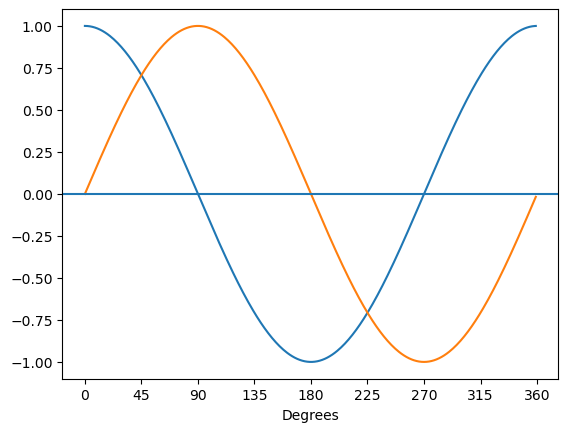

In [24]:
import numpy as np
import matplotlib.pyplot as plt
l = 360
sin_wave = np.array([np.sin(x/l*2*np.pi) for x in range(l)])
cos_wave = np.array([np.cos(x/l*2*np.pi) for x in range(l)])
plt.plot(cos_wave,label="Cosine")
plt.plot(sin_wave,label="Sine")
plt.xticks([i for i in range(0,361,45)])
plt.xlabel("Degrees")
plt.axhline(0);

You may also be familiar with something called [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series), which is a way to decompose any time series of data into a superposition of sines and cosines. In the simplest case, we can look at a single wave, and note that we can draw the wave with any *phase* (i.e., it's peak at a certain location on the X-axis) by a simple but clever combination of a single cosine and a single sine:
$$\cos(x-\phi) = \cos(\phi) \cdot \cos(x) + \sin(\phi) \cdot \sin(x)$$

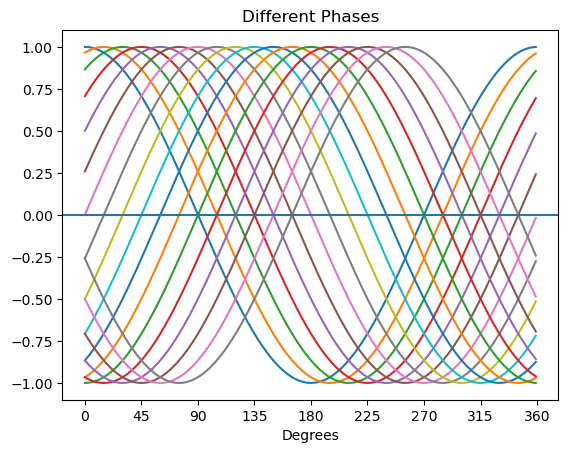

In [25]:
l = 360
sin_wave = np.array([np.sin(x/l*2*np.pi) for x in range(l)])
cos_wave = np.array([np.cos(x/l*2*np.pi) for x in range(l)])
for i in range(18):
    phase = (i*15)/180*np.pi
    a = np.cos(phase) ; b = np.sin(phase)
    plt.plot(a*cos_wave+b*sin_wave)
plt.xticks([i for i in range(0,361,45)])
plt.xlabel("Degrees")
plt.title("Different Phases")
plt.axhline(0);

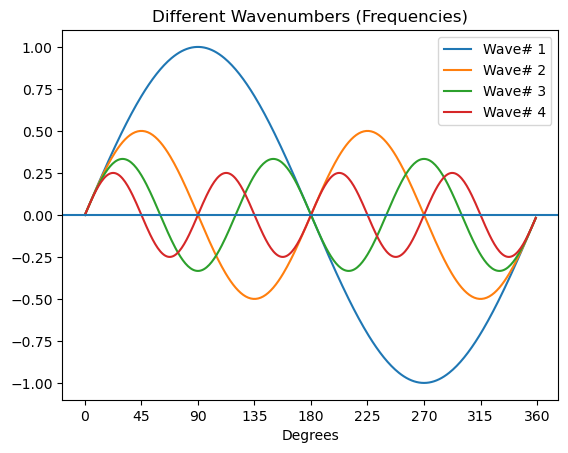

In [28]:
for n in range(1,5):
    l = 360
    sin_wave = np.array([np.sin(n*x/l*2*np.pi) for x in range(l)])
    cos_wave = np.array([np.cos(n*x/l*2*np.pi) for x in range(l)])
    phase = 0.5*np.pi
    a = np.cos(phase) ; b = np.sin(phase)
    mag = 1/n
    plt.plot(mag*(a*cos_wave+b*sin_wave),label=f"Wave# {n}")
plt.xticks([i for i in range(0,361,45)])
plt.xlabel("Degrees")
plt.legend()
plt.title("Different Wavenumbers (Frequencies)")
plt.axhline(0);

A more complicated wave (with periodic boundary conditions) can be constructed by combining different waves, each with its own:
* Amplitude
* Phase
* Wavenumber (or wavelength, or frequency)

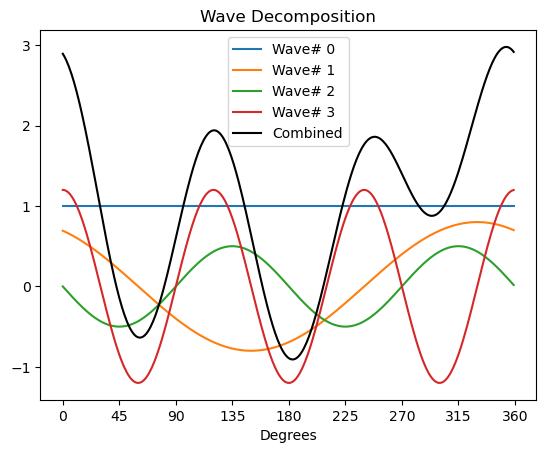

In [45]:
def wave(l,n,p): # l=points, n=wavenumber, p=phase
    sin_wave = np.array([np.sin(n*x/l*2*np.pi) for x in range(l)])
    cos_wave = np.array([np.cos(n*x/l*2*np.pi) for x in range(l)])
    phase = p/180*np.pi
    a = np.cos(phase) ; b = np.sin(phase)
    return (a*cos_wave+b*sin_wave)

l = 360                              # Number of grid points in one cycle
a0, a1, a2, a3 = 1.0, 0.8, 0.5, 1.2  # Amplitudes of each harmonic
p1, p2, p3     = -30, -90, 0         # Phases of each harmonic

www = a0 + a1 * wave(l,1,p1) + a2 * wave(l,2,p2) + a3 * wave(l,3,p3) # Sum of all waves

plt.plot(a0 * wave(l,0,0),label="Wave# 0")
plt.plot(a1 * wave(l,1,p1),label="Wave# 1")
plt.plot(a2 * wave(l,2,p2),label="Wave# 2")
plt.plot(a3 * wave(l,3,p3),label="Wave# 3")
plt.plot(www,'k',label="Combined")
#plt.axhline(a0,c='lightgrey')

plt.xticks([i for i in range(0,361,45)])
plt.xlabel("Degrees")
plt.legend()
plt.title("Wave Decomposition") ;

Notice in the example above, the amplitudes are analogous to the variability of each wavenumber. In the example above, the highest frequency wave (wavenumber 3) has the largest amplitude (`a3`=1.2). Even though the mean (`a0`) has a value of 1, it doesn't vary in time, so its variance is 0.

This process can be reversed. If we have a complicated wave (e.g., as an observed time series where instead of _degrees_ we have _timesteps_), we can use Fourier Decomposition to break it into a sum of simple waves, each with its own amplitude, phase and wavenumber.

Note that each of these individual wave components is _orthogonal_ to every other. We can see this by calculating correlations between them:

In [52]:
np.correlate(wave(l,1,p1),wave(l,2,p2))[0],np.correlate(wave(l,1,p1),wave(l,3,p3))[0],np.correlate(wave(l,2,p2),wave(l,3,p3))[0]

(-2.7824964554667986e-15, -1.3655743202889425e-14, -2.095545958979983e-15)

EOF analyses work in a similar fashion. 
Think of the values in the time series at each grid cell as like a set a waves. 

However, in an EOF decomposition, the time series does not have to be a steady wave, but can have any kind of trace (eigenvalues).
Also, by design, the grid cells are not independent, but relate to each other via the patterns (eigenvectors).

----------------

### Example of how EOFs are used... NAO

The **[North Atlantic Oscillation NAO](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-pc-based)** index is simply the magnitude of the *eigenvalue* of the first EOF of sea-level pressure anomalies over the Atlantic sector, 20°-80°N, 90°W-40°E. 

![NAO in DJF](https://climatedataguide.ucar.edu/sites/default/files/styles/square/public/2022-03/nao_pc_djf_8.gif?itok=HyiSjKNZ)

### Example of how EOFs are used... MJO

The phase of the **Madden-Julian Oscillation (MJO)** is typically portrayed by use of EOFs.  

#### What is the MJO?

From [climate.gov](https://www.climate.gov/news-features/blogs/enso/what-mjo-and-why-do-we-care):

> Imagine ENSO as a person riding a stationary exercise bike in the middle of a stage all day long. His unchanging location is associated with the persistent changes in tropical rainfall and winds that we have previously described as being linked to ENSO. Now imagine another bike rider entering the stage on the left and pedaling slowly across the stage, passing the stationary bike (ENSO), and exiting the stage at the right. This bike rider we will call the MJO and he/she may cross the stage from left to right several times during the show.

So, you can think of a single wave travelling around the equator as being represented by a combination of two *stationary* waves (analogous to *eigenvectors*, showing the shape or pattern that contribute to the variability of the MJO) and the changing *phase* as the MJO propagates from west to east are the *eigenvalues*: $a = \cos(\phi)$ and $b = \sin(\phi)$ in the cell above.

![Image of MJO phases](https://www.climate.gov/sites/default/files/styles/full_width_620_original_image/public/2021-10/MJO-fig1.png?itok=0Gxx4Kh5)

The MJO is not equally strong all the way around the globe, but peaks in strength around Indonesia and is weak over the Atlantic. Thus, you can think of one of the stationary trig functions being more dominant, and the other one secondary. As a result, the MJO is commonly quantified by the *eigenvalues* of its first two EOFs. One of the most widely used is the [Real-time Multivariate MJO Index (RMM)](https://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/index.html?Set-Language=en) a.k.a. "Wheeler and Hendon Index".  Shown below is a variant called the "Real-time OLR MJO Index" that uses only outgoing longwave radiation measured by satellite:


![Current ROMI](https://psl.noaa.gov/mjo/mjoindex/romi_phase_diag.png)

The MJO depicted in terms of the magnitudes of EOF1 and EOF2 typically trace a rough circle when their eigenvalues are plotted along the two axes. The time it takes to propagate around the center is the period of the MJO. In this way, stationary patterns represented by eigenvectors can depict a moving pattern by the way the eigenvalues change in time.

## Generalization of the idea of Component Analyses

PCA is specifically designed to find the orthogonal patterns ranked by their total _variance_ from largest to smallest. 
In other words, EOFs that represent the most variable components of a climate variable, from largest to smallest.

But variance is not the only characteristic that can be used to decompose cliamte fields. 
For instance, one can optimize on the patterns that have the highest signal-to-noise ratios, i.e., that are the most _predictable_.
This is called **Predictable Component Analysis (PrCA)** and is very useful for weather and climate prediction studies.

In studies of _predictability_ and chaos theory, which are concerned with the growth of errors in forecasts, once can decompose data into orthogonal components (or **modes**) ranked from fastest-growing to slowest growing, or from the largest saturation amplitude to smallest. 